In [1]:
pip install pycaret -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 2023.128.151533 requires jupyterlab~=3.6.0, but you have jupyterlab 4.1.6 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.9.2 requires shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
xarray 2024.3.0 requires packaging>=22, but you have packaging 21.3 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated p

In [2]:
# pip install autoviz -q

In [3]:
import re
import time
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor

In [4]:
%matplotlib inline

In [5]:
warnings.filterwarnings('ignore')

In [6]:
from pycaret.regression import *

In [7]:
df = pd.read_csv('../input/house-price-tehran-iran/housePrice.csv')
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3026,108,2,True,True,True,Shahr-e-Ziba,5.100000e+09,170000.00
3153,77,2,False,True,True,Azarbaijan,1.800000e+09,60000.00
3275,112,2,True,True,True,Shahran,5.400000e+09,180000.00
1494,80,2,True,True,True,Jeyhoon,1.500000e+09,50000.00
2401,220,5,True,False,False,Andisheh,6.500000e+09,216666.67


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [9]:
df.drop('Price(USD)', axis=1, inplace=True)

In [10]:
setup(df, target='Price', session_id=85, remove_outliers=True)

,Description,Value
0,Session id,85
1,Target,Price
2,Target type,Regression
3,Original data shape,"(3479, 7)"
4,Transformed data shape,"(3357, 7)"
5,Transformed train set shape,"(2313, 7)"
6,Transformed test set shape,"(1044, 7)"
7,Numeric features,1
8,Categorical features,2
9,Rows with missing values,0.7%


In [11]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1787068166.2256,32607070379028836352.0000,5370151218.8995,0.5414,0.5069,0.4474,2.0080
et,Extra Trees Regressor,1823696328.6765,33692139050886713344.0000,5418666552.5989,0.5371,0.5173,0.4336,0.3930
lightgbm,Light Gradient Boosting Machine,1850921317.1389,33901565516324040704.0000,5473993468.5078,0.5246,0.4909,0.4263,0.6490
gbr,Gradient Boosting Regressor,1869451000.9279,32768195979990835200.0000,5451537576.2650,0.5212,0.5211,0.4815,0.2260
xgboost,Extreme Gradient Boosting,1786040678.4000,33936436864154492928.0000,5497413017.6000,0.5201,0.5249,0.4220,0.2070
rf,Random Forest Regressor,1836202243.8133,35120587005921230848.0000,5551883571.7572,0.5134,0.5016,0.4147,0.4100
knn,K Neighbors Regressor,2037582374.4000,37219049279796019200.0000,5751254720.0000,0.4772,0.5646,0.5148,0.1680
lasso,Lasso Regression,2601293612.7778,36766955829048868864.0000,5814135261.6413,0.4616,0.9709,1.0037,0.1650
lr,Linear Regression,2601293587.3264,36766955675486199808.0000,5814135244.9921,0.4616,0.9709,1.0037,0.8630
llar,Lasso Least Angle Regression,2601293612.7778,36766955829048868864.0000,5814135261.6413,0.4616,0.9709,1.0037,0.1640


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [12]:
my_model = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2479386880.0000,51988542547667451904.0000,7210308096.0000,0.4964,0.6233,0.4693
1,1815818112.0000,46944933177477562368.0000,6851637248.0000,0.4959,0.4994,0.4204
2,1499436288.0000,21151434925898989568.0000,4599068672.0000,0.5200,0.5420,0.5832
3,1790795264.0000,51692290134679486464.0000,7189734912.0000,0.3209,0.5222,0.3671
4,2119836928.0000,40256159743018532864.0000,6344774144.0000,0.4099,0.4992,0.4068
5,2285190656.0000,48404011495815380992.0000,6957299200.0000,0.4076,0.5484,0.4099
6,2065661824.0000,53211520535149674496.0000,7294622720.0000,0.4073,0.4827,0.3888
7,1316253696.0000,11084802341726060544.0000,3329384704.0000,0.5942,0.4347,0.3541
8,1466868096.0000,11212805286408486912.0000,3348552704.0000,0.6780,0.5097,0.4051


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
df.sample(3)

,Area,Room,Parking,Warehouse,Elevator,Address,Price
2932,103,2,True,True,True,Feiz Garden,4.000000e+09
2092,70,2,False,True,True,Elm-o-Sanat,1.800000e+09
1847,75,2,True,True,False,West Ferdows Boulevard,2.500000e+09


In [14]:
df.describe()

,Room,Price
count,3479.000000,3.479000e+03
mean,2.079908,5.359023e+09
std,0.758275,8.099935e+09
min,0.000000,3.600000e+06
25%,2.000000,1.418250e+09
50%,2.000000,2.900000e+09
75%,2.000000,6.000000e+09
max,5.000000,9.240000e+10


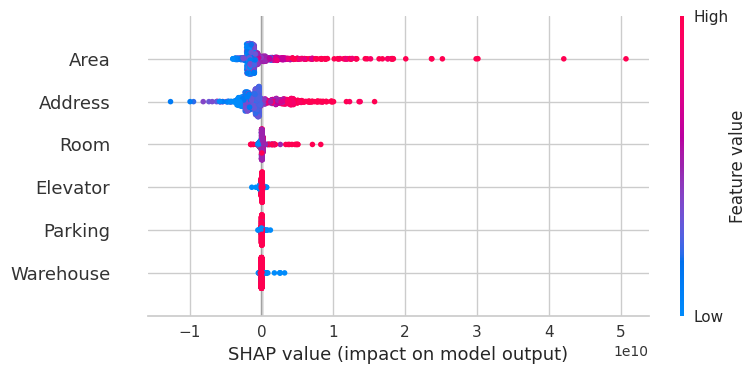

In [15]:
interpret_model(my_model)

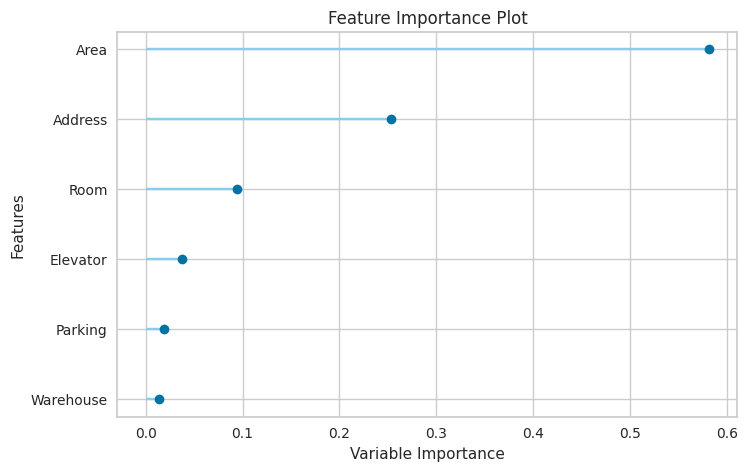

In [16]:
plot_model(estimator=my_model, plot='feature')

In [17]:
df.Area = df.Area.apply(lambda x: re.sub(',', '', x))
df.Area = pd.to_numeric(df.Area, errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3479 non-null   int64  
 1   Room       3479 non-null   int64  
 2   Parking    3479 non-null   bool   
 3   Warehouse  3479 non-null   bool   
 4   Elevator   3479 non-null   bool   
 5   Address    3456 non-null   object 
 6   Price      3479 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(1)
memory usage: 119.0+ KB


In [19]:
df.describe()

,Area,Room,Price
count,3.479000e+03,3479.000000,3.479000e+03
mean,8.744000e+06,2.079908,5.359023e+09
std,3.167266e+08,0.758275,8.099935e+09
min,3.000000e+01,0.000000,3.600000e+06
25%,6.900000e+01,2.000000,1.418250e+09
50%,9.000000e+01,2.000000,2.900000e+09
75%,1.200000e+02,2.000000,6.000000e+09
max,1.616000e+10,5.000000,9.240000e+10


In [20]:
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price         0
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3456 non-null   int64  
 1   Room       3456 non-null   int64  
 2   Parking    3456 non-null   bool   
 3   Warehouse  3456 non-null   bool   
 4   Elevator   3456 non-null   bool   
 5   Address    3456 non-null   object 
 6   Price      3456 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(1)
memory usage: 145.1+ KB


In [23]:
df.Parking.value_counts(normalize=True) * 100

Parking
True     84.751157
False    15.248843
Name: proportion, dtype: float64

In [24]:
pd.crosstab(df.Parking, df.Room)

Room,0,1,2,3,4,5
Parking,,,,,,
False,8,243,244,26,1,5
True,2,426,1699,705,69,28


In [25]:
below_85_area = df[df.Area <= 85]
len(below_85_area)

1522

In [26]:
below_85_area.Parking.value_counts(normalize=True) * 100

Parking
True     72.536137
False    27.463863
Name: proportion, dtype: float64

In [27]:
df.Address.unique().size

192

In [28]:
pd.set_option('display.float_format', lambda x : '%.f' % x)

In [29]:
#pd.set_option('display.float_format', lambda x : f"{x:,}")
df.groupby('Room')['Price'].mean()

Room
0    7860500000
1    1707480867
2    3330303037
3   10938692886
4   25600328571
5   33734393939
Name: Price, dtype: float64

In [30]:
room_parking_room_mean_df = df.groupby(['Room', 'Parking'])['Price'].mean().reset_index()
room_parking_room_mean_df

,Room,Parking,Price
0,0,False,9769750000
1,0,True,223500000
2,1,False,1139677778
3,1,True,2031368545
4,2,False,1501674180
5,2,True,3592919541
6,3,False,5107865385
7,3,True,11153730496
8,4,False,6200000000
9,4,True,25881492754


In [31]:
df_2 = df.copy()

In [32]:
df_2.loc[:, 'Price'] = df.Price.map("{:,.0f}".format)
df_2

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,"1,850,000,000"
1,60,1,True,True,True,Shahran,"1,850,000,000"
2,79,2,True,True,True,Pardis,"550,000,000"
3,95,2,True,True,True,Shahrake Qods,"902,500,000"
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000"
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,"3,500,000,000"
3475,83,2,True,True,True,Niavaran,"6,800,000,000"
3476,75,2,False,False,False,Parand,"365,000,000"
3477,105,2,True,True,True,Dorous,"5,600,000,000"


<Figure size 800x600 with 0 Axes>

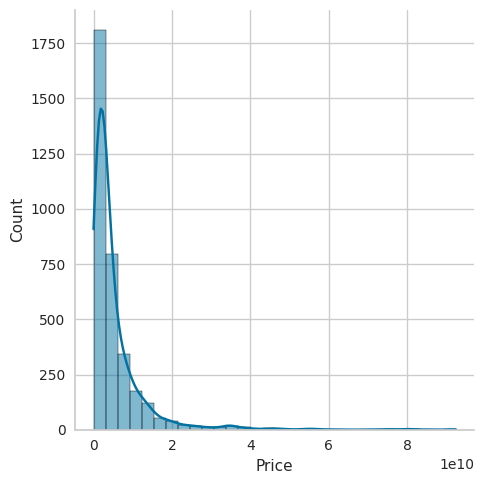

In [33]:
plt.figure(figsize=(8, 6))
sns.displot(df.Price, bins=30, kde=True)
plt.show()

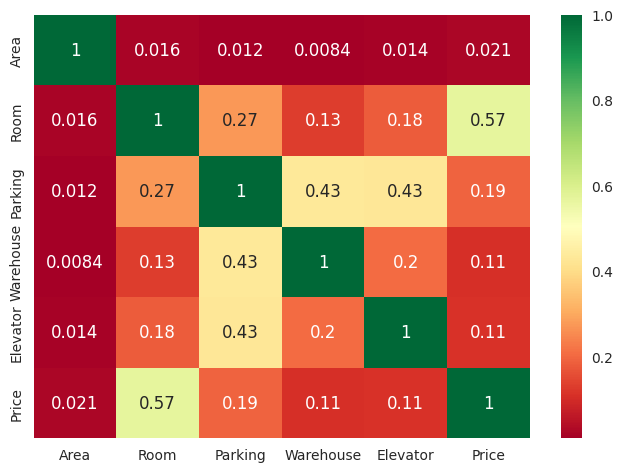

In [34]:
sns.heatmap(df.drop('Address', axis=1).corr(), annot=True, cmap='RdYlGn')
plt.show()

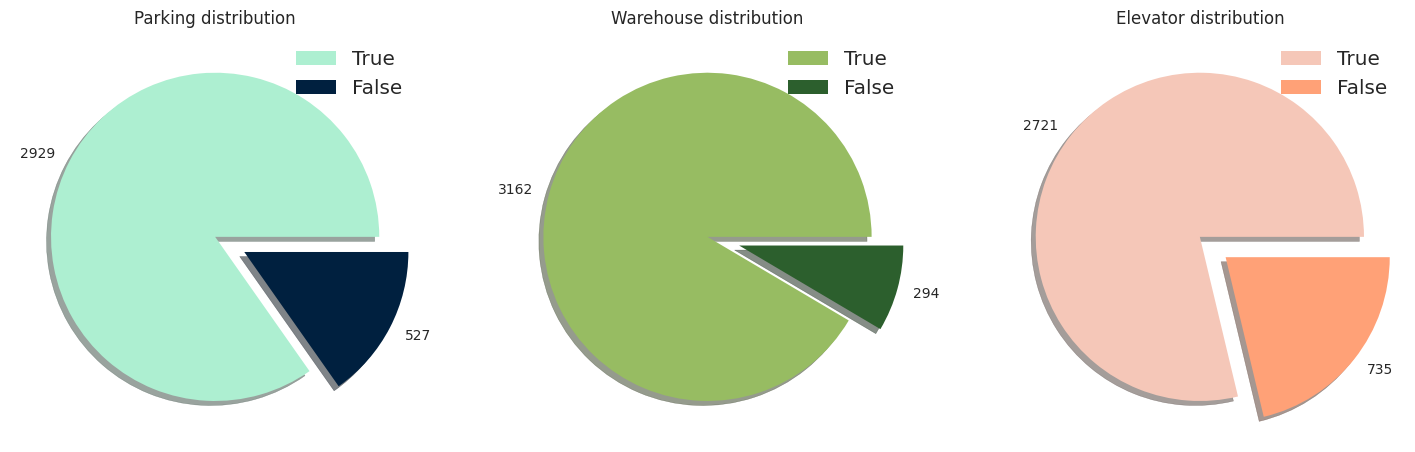

In [35]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']

for i in range(3):
        data = df[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]))

In [36]:
df3_address = df.Address.value_counts().copy()
df3_address = df3_address[:8]
df3_address

Address
Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                141
Shahran                   130
Saadat Abad               129
Parand                    127
Shahr-e-Ziba              109
Name: count, dtype: int64

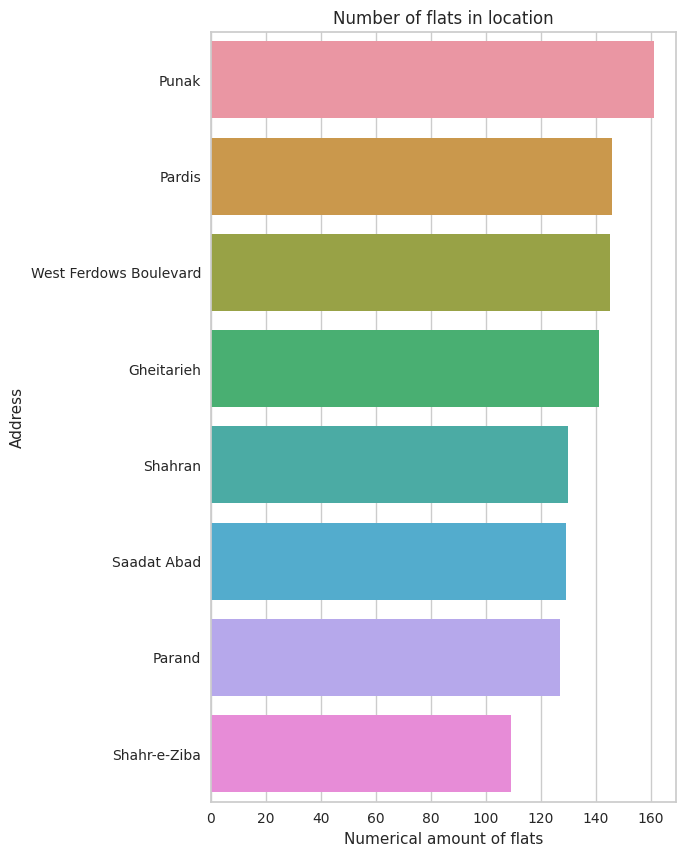

In [37]:
fig, ax = plt.subplots(figsize=(6,10))
sns.barplot(x=df3_address.values, y=df3_address.index, ax=ax)
plt.xlabel('Numerical amount of flats')
plt.title('Number of flats in location')
plt.show()

In [38]:
df.sort_values('Price', ascending=False)[['Address', 'Price']].head(10)

,Address,Price
1707,Zaferanieh,92400000000
1810,Abazar,91000000000
430,Lavasan,85000000000
819,Ekhtiarieh,81600000000
1332,Niavaran,80500000000
1694,Zafar,80000000000
3051,Dorous,79500000000
3107,Tajrish,75600000000
831,Mahmoudieh,75000000000
2394,Aqdasieh,74400000000


In [39]:
df.isnull().sum()

Area         0
Room         0
Parking      0
Warehouse    0
Elevator     0
Address      0
Price        0
dtype: int64

In [40]:
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000
...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3500000000
3475,83,2,True,True,True,Niavaran,6800000000
3476,75,2,False,False,False,Parand,365000000
3477,105,2,True,True,True,Dorous,5600000000


In [41]:
boolean_features = ['Parking', 'Warehouse', 'Elevator']
df[boolean_features] = df[boolean_features].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3456 non-null   int64  
 1   Room       3456 non-null   int64  
 2   Parking    3456 non-null   int64  
 3   Warehouse  3456 non-null   int64  
 4   Elevator   3456 non-null   int64  
 5   Address    3456 non-null   object 
 6   Price      3456 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 216.0+ KB


In [42]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1850000000
1,60,1,1,1,1,Shahran,1850000000
2,79,2,1,1,1,Pardis,550000000
3,95,2,1,1,1,Shahrake Qods,902500000
4,123,2,1,1,1,Shahrake Gharb,7000000000


In [43]:
print(f"Skewness of feautres:\n{df.drop('Address', axis=1).skew()}")

Skewness of feautres:
Area        44
Room         1
Parking     -2
Warehouse   -3
Elevator    -1
Price        5
dtype: float64


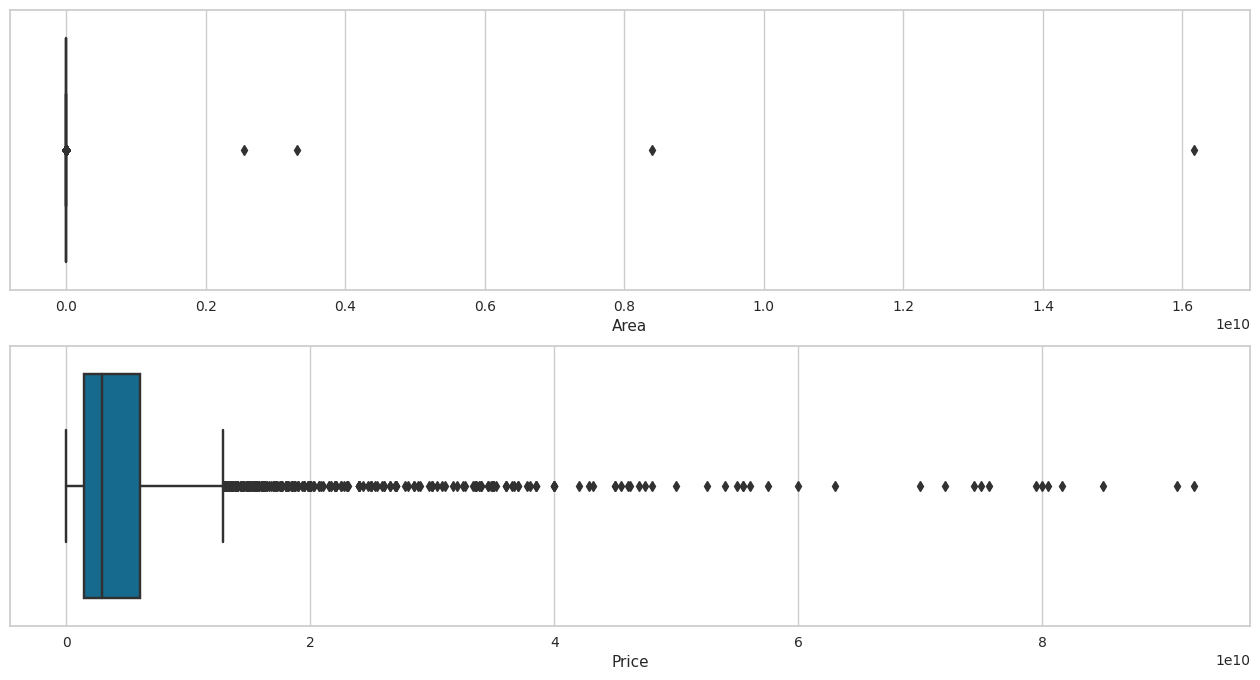

In [44]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 1, 1)
sns.boxplot(x=df.Area)

plt.subplot(2, 1, 2)
sns.boxplot(x=df.Price)

plt.show()

In [45]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

In [46]:
lower_area, upper_area = lower_upper(df.Area)
lower_price, upper_price = lower_upper(df.Price)

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -9.00
Upper limit for area: 199.00
Lower limit for price: -5,450,000,000.0
Upper limit for price: 12,870,000,000.0


In [47]:
area_outliers = np.where(df['Area'] > upper_area)
price_outliers = np.where(df['Price'] > upper_price)
total_outliers = np.union1d(area_outliers, price_outliers)

print(f"Number of area outliers: {len(df.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df.iloc[price_outliers])}")
print(f"Number of outliers: {len(df.iloc[total_outliers])}")

Number of area outliers: 237
Number of price outliers: 310
Number of outliers: 366


In [48]:
address_dummy = pd.get_dummies(df.Address).astype('int64')

df_final = df.merge(address_dummy, left_index=True, right_index=True)
df_final.drop('Address', axis=1, inplace=True)
df_final

,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,550000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95,2,1,1,1,902500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,7000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,3500000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3475,83,2,1,1,1,6800000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476,75,2,0,0,0,365000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3477,105,2,1,1,1,5600000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X = df_final.drop(columns = 'Price')
y = df_final['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(f"Shape of X train: {X_train.shape}")
print(f"Shape of y train: {y_train.shape}")
print(f"Shape of X test: {X_test.shape}")
print(f"Shape of y train: {y_test.shape}")

Shape of X train: (2764, 197)
Shape of y train: (2764,)
Shape of X test: (692, 197)
Shape of y train: (692,)


In [50]:
def parameter_finder(model, parameters):
    start = time.time()
    
    grid = GridSearchCV(model, param_grid=parameters, refit=True, cv=KFold(shuffle=True, random_state=1), n_jobs=-1)
    grid.fit(X_train, y_train)
    
    y_train_pred = grid.predict(X_train)
    y_test_pred = grid.predict(X_test)

    train_score = grid.score(X_train, y_train)
    test_score = grid.score(X_test, y_test)
    
    RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    model_name = str(model).split('(')[0]
    
    end = time.time()
    
    print(f"The best parameters for {model_name} model is: {grid.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")
    
    return train_score, test_score, RMSE

In [51]:
lr = LinearRegression(n_jobs=-1)
lr_train_score, lr_test_score, lr_RMSE = parameter_finder(lr, {})

The best parameters for LinearRegression model is: {}
--------------------
(R2 score) in the training set is 60.40% for LinearRegression model.
(R2 score) in the testing set is 53.35% for LinearRegression model.
RMSE is 6,357,973,664.868129 for LinearRegression model.
--------------------
Runtime of the program is: 1.46


In [52]:
ridge = Ridge(random_state = 1) # Linear least squares with l2 regularization.
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

ridge_train_score, ridge_test_score, ridge_RMSE = parameter_finder(ridge, param_ridge)

The best parameters for Ridge model is: {'alpha': 0.001}
--------------------
(R2 score) in the training set is 60.40% for Ridge model.
(R2 score) in the testing set is 53.36% for Ridge model.
RMSE is 6,357,553,945.624988 for Ridge model.
--------------------
Runtime of the program is: 4.09


In [53]:
lasso = Lasso(random_state = 1) # Linear Model trained with L1 prior as regularizer.
param_lasso = {'alpha': [0.001, 0.01, 0.1]}

lasso_train_score, lasso_test_score, lasso_RMSE = parameter_finder(lasso, param_lasso)

The best parameters for Lasso model is: {'alpha': 0.001}
--------------------
(R2 score) in the training set is 60.40% for Lasso model.
(R2 score) in the testing set is 53.35% for Lasso model.
RMSE is 6,357,953,517.829563 for Lasso model.
--------------------
Runtime of the program is: 34.63


In [54]:
eln = ElasticNet(random_state = 1) # Linear regression with combined L1 and L2 priors as regularizer.
param_eln = {'alpha': [0.001, 0.1],
            'l1_ratio': [0.3, 0.7]}

eln_train_score, eln_test_score, eln_RMSE = parameter_finder(eln, param_eln)

The best parameters for ElasticNet model is: {'alpha': 0.001, 'l1_ratio': 0.7}
--------------------
(R2 score) in the training set is 59.51% for ElasticNet model.
(R2 score) in the testing set is 55.36% for ElasticNet model.
RMSE is 6,219,838,182.729824 for ElasticNet model.
--------------------
Runtime of the program is: 30.87


In [55]:
dtr = DecisionTreeRegressor(random_state = 1)
param_dtr = {'min_samples_split': [2, 3, 4],
            'min_samples_leaf': [1, 2, 3]}

dtr_train_score, dtr_test_score, dtr_RMSE = parameter_finder(dtr, param_dtr)

The best parameters for DecisionTreeRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 3}
--------------------
(R2 score) in the training set is 97.91% for DecisionTreeRegressor model.
(R2 score) in the testing set is 71.37% for DecisionTreeRegressor model.
RMSE is 4,980,876,315.211948 for DecisionTreeRegressor model.
--------------------
Runtime of the program is: 1.87


In [56]:
rfr = RandomForestRegressor(random_state = 1, n_jobs = -1)
param_rfr = {'min_samples_split': [3, 4],
            'min_samples_leaf': [1, 2]}

rfr_train_score, rfr_test_score, rfr_RMSE = parameter_finder(rfr, param_rfr)

The best parameters for RandomForestRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 3}
--------------------
(R2 score) in the training set is 94.05% for RandomForestRegressor model.
(R2 score) in the testing set is 77.55% for RandomForestRegressor model.
RMSE is 4,411,228,714.032563 for RandomForestRegressor model.
--------------------
Runtime of the program is: 38.30


In [57]:
knr = KNeighborsRegressor(n_jobs = -1)
param_knr = {'n_neighbors': [5, 10, 15, 20],
            'weights': ['uniform', 'distance']}

knr_train_score, knr_test_score, knr_RMSE = parameter_finder(knr, param_knr)

The best parameters for KNeighborsRegressor model is: {'n_neighbors': 20, 'weights': 'uniform'}
--------------------
(R2 score) in the training set is 60.39% for KNeighborsRegressor model.
(R2 score) in the testing set is 63.99% for KNeighborsRegressor model.
RMSE is 5,586,254,776.237762 for KNeighborsRegressor model.
--------------------
Runtime of the program is: 8.29


In [58]:
xgboost = XGBRegressor(n_jobs = -1)

param_xgboost = {
    'n_estimators': [300],
    'learning_rate': [0.1],
    'subsample': [0.75],
    'colsample_bytree': [1],
    'max_depth': [3,5],
    'gamma': [0]
}

xgboost_train_score, xgboost_test_score, xgboost_RMSE = parameter_finder(xgboost, param_xgboost)

The best parameters for XGBRegressor model is: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.75}
--------------------
(R2 score) in the training set is 97.31% for XGBRegressor model.
(R2 score) in the testing set is 73.46% for XGBRegressor model.
RMSE is 4,795,611,652.25946 for XGBRegressor model.
--------------------
Runtime of the program is: 12.83


In [59]:
models_score = pd.DataFrame({'Training score': [lr_train_score, ridge_train_score, lasso_train_score, eln_train_score, dtr_train_score, rfr_train_score, knr_train_score,xgboost_train_score],
                             'Testing score': [lr_test_score, ridge_test_score, lasso_test_score, eln_test_score, dtr_test_score, rfr_test_score, knr_test_score,xgboost_test_score],
                             'RMSE': [lr_RMSE, ridge_RMSE, lasso_RMSE, eln_RMSE, dtr_RMSE, rfr_RMSE, knr_RMSE,xgboost_RMSE]},
                             index = ['LinearRegression', 'Ridge', 'Lasso','ElasticNet', 'DecisionTreeRegressor', 'RandomForestRegressor', 'KNeighborsRegressor','XGBoostRegressor'])

models_score

,Training score,Testing score,RMSE
LinearRegression,1,1,6357973665
Ridge,1,1,6357553946
Lasso,1,1,6357953518
ElasticNet,1,1,6219838183
DecisionTreeRegressor,1,1,4980876315
RandomForestRegressor,1,1,4411228714
KNeighborsRegressor,1,1,5586254776
XGBoostRegressor,1,1,4795611652


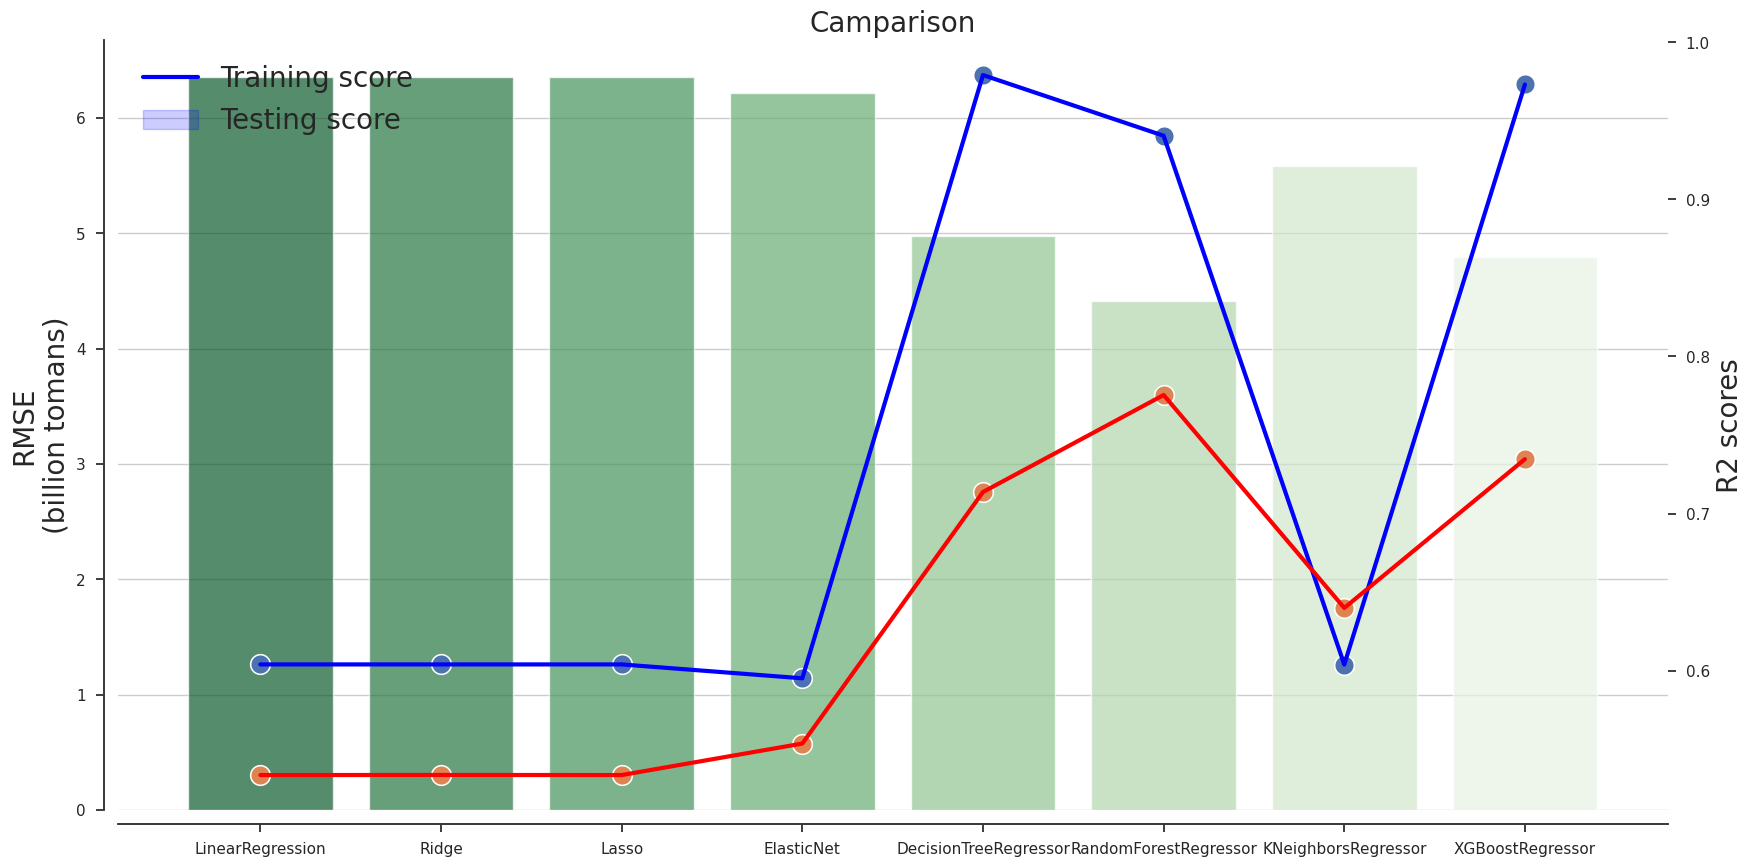

In [60]:
fig, ax = plt.subplots(figsize=(20,10))

sns.set(style='white')
ax.set_title("Camparison", fontsize = 20)
ax = sns.barplot(x = list(models_score.index), y = models_score['RMSE']/1000000000, alpha = 0.7, palette='Greens_r')
ax.set_ylabel("RMSE\n(billion tomans)", fontsize = 20)

sec_ax = ax.twinx()
sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Training score'], linewidth = 3, color = 'blue')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Training score'], s = 200)
sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Testing score'], linewidth = 3, color = 'red')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Testing score'], s = 200)
sec_ax.set_ylabel("R2 scores", fontsize = 20)
sec_ax.legend(labels = ['Training score', 'Testing score'], fontsize = 20)

sns.despine(offset = 10)
plt.show()